In [1]:
import os
import json
import pandas as pd
import numpy as np
import tqdm
import scipy.sparse as sp

from pprint import pprint

%pylab inline

DATA_PATH = './'

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%time
transactions = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'consumption_mode': 'category',
        'ts': np.float64,
        'watched_time': np.uint64,
        'device_type': np.uint8,
        'device_manufacturer': np.uint8
    }
)

CPU times: user 10.5 s, sys: 692 ms, total: 11.2 s
Wall time: 11.8 s


In [3]:
%%time
ratings = pd.read_csv(
    os.path.join(DATA_PATH, 'ratings.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64,
        'rating': np.uint8
    }
)

CPU times: user 338 ms, sys: 10.9 ms, total: 348 ms
Wall time: 388 ms


In [4]:
%%time
bookmarks = pd.read_csv(
    os.path.join(DATA_PATH, 'bookmarks.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64
    }
)

CPU times: user 609 ms, sys: 28.3 ms, total: 637 ms
Wall time: 656 ms


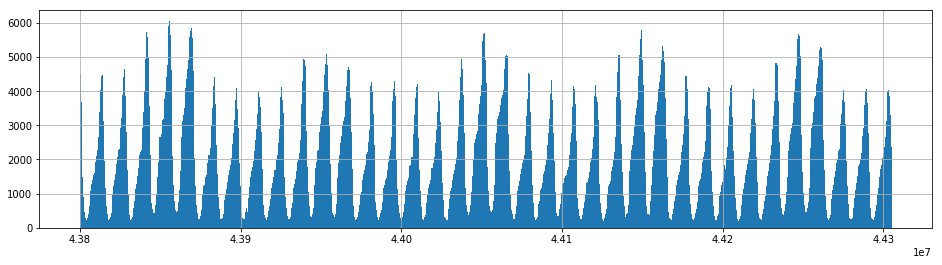

In [5]:
plt.figure(figsize = (16, 4))
transactions[transactions.ts > 4.38e7].ts.hist(bins = 1000);

In [6]:
(4.43e7-4.38e7)/35

14285.714285714286

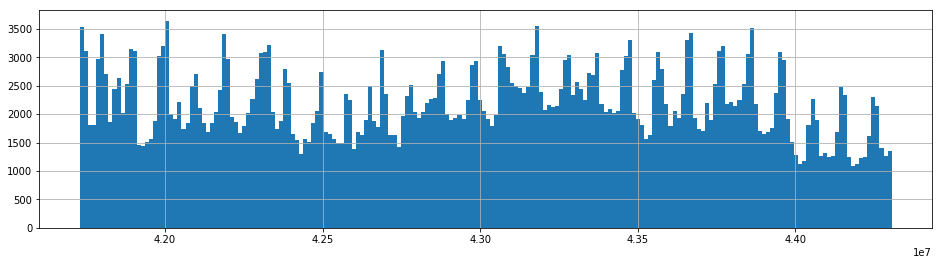

In [7]:
plt.figure(figsize = (16, 4))
ratings.ts.hist(bins = 200);

In [8]:
(ratings.ts.max()-ratings.ts.min())/26/7

14145.740874582758

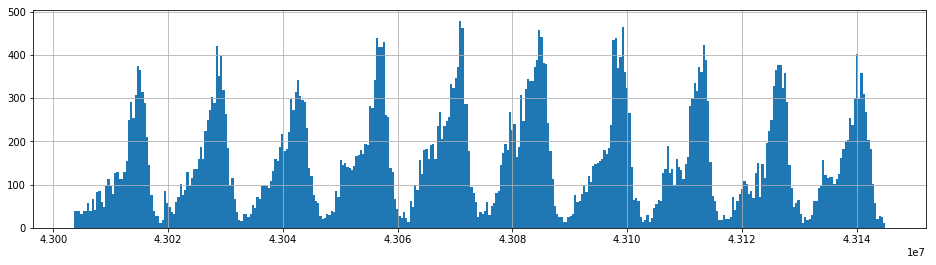

In [9]:
plt.figure(figsize = (16, 4))
bookmarks[bookmarks.ts.between(4.30035e7, 4.3145e7)].ts.hist(bins = 360);

In [10]:
(4.3145e7-4.30035e7)/10

14150.0

In [11]:
25*7

175

In [12]:
(transactions.ts.max()-transactions.ts.min())/14150

181.94686096104527

In [15]:
ratings.ts.max()-transactions.ts.max()

-6.954921893775463

In [16]:
bookmarks.ts.max()-transactions.ts.max()

-19.910581342875957